In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('advertising.csv')

df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


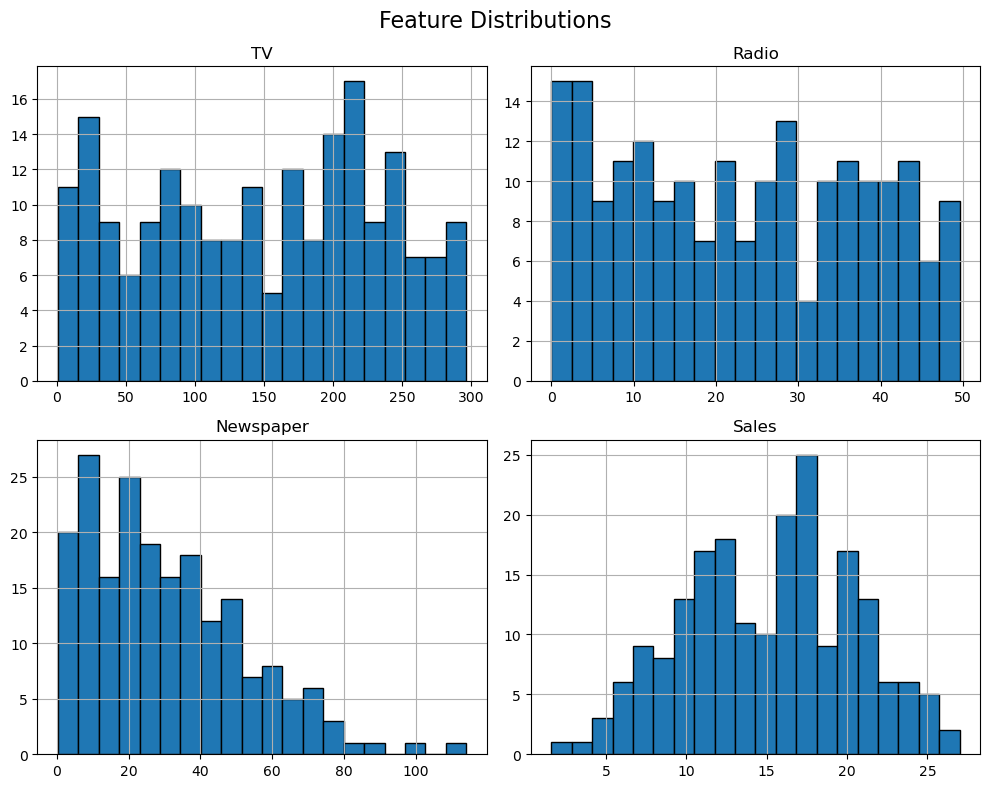

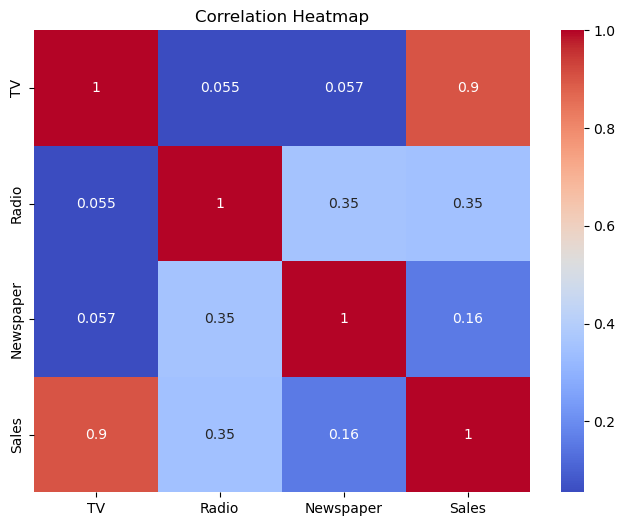

In [9]:
# Histograms
df.hist(bins=20, figsize=(10, 8), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


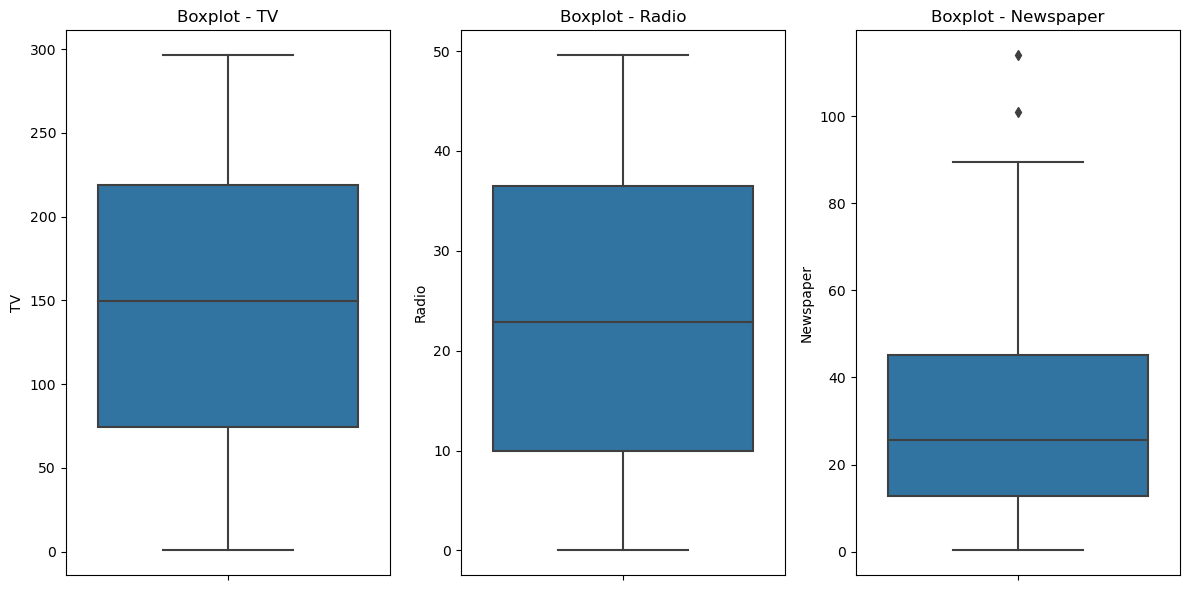

Original shape: (200, 4)
After outlier removal: (198, 4)


In [15]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1], 1):  
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot - {column}')
plt.tight_layout()
plt.show()

# Function to remove outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers
df_no_outliers = detect_outliers_iqr(df)

print(f"Original shape: {df.shape}")
print(f"After outlier removal: {df_no_outliers.shape}")


In [17]:
def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

def z_score_scaling(df):
    return (df - df.mean()) / df.std()


In [18]:
def linear_regression(X, y):
    X = np.c_[np.ones(X.shape[0]), X]  
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

def predict(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ theta

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [13]:
def run_experiment(df, scaler=None, remove_outliers=False):
    data = df.copy()
    if remove_outliers:
        data = detect_outliers_iqr(data)

    X = data.drop(columns=['Sales'])
    y = data['Sales'].values

    if scaler:
        X = scaler(X)

    theta = linear_regression(X.values, y)
    y_pred = predict(X.values, theta)
    mse = mean_squared_error(y, y_pred)

    return mse, theta


In [19]:
scalers = {
    'None': None,
    'Min-Max': min_max_scaling,
    'Z-Score': z_score_scaling
}

for scale_name, scale_func in scalers.items():
    for outlier_flag in [False, True]:
        mse_val, _ = run_experiment(df, scaler=scale_func, remove_outliers=outlier_flag)
        print(f"Scaler: {scale_name}, Outliers Removed: {outlier_flag}, MSE: {mse_val:.4f}")


Scaler: None, Outliers Removed: False, MSE: 2.7060
Scaler: None, Outliers Removed: True, MSE: 2.7290
Scaler: Min-Max, Outliers Removed: False, MSE: 2.7060
Scaler: Min-Max, Outliers Removed: True, MSE: 2.7290
Scaler: Z-Score, Outliers Removed: False, MSE: 2.7060
Scaler: Z-Score, Outliers Removed: True, MSE: 2.7290


In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv('faa_ai_prelim.csv')
df.head()


,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-FEB-16,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-FEB-16,18-FEB-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-FEB-16,18-FEB-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-FEB-16,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-FEB-16,18-FEB-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Columns:\n", df.columns.tolist())
print(df.columns.tolist())



Shape: (83, 42)
Missing values:
 UPDATED                 0
ENTRY_DATE              0
EVENT_LCL_DATE          0
EVENT_LCL_TIME          0
LOC_CITY_NAME           0
LOC_STATE_NAME          0
LOC_CNTRY_NAME         81
RMK_TEXT                0
EVENT_TYPE_DESC         0
FSDO_DESC               2
REGIST_NBR              0
FLT_NBR                77
ACFT_OPRTR             76
ACFT_MAKE_NAME          5
ACFT_MODEL_NAME         4
ACFT_MISSING_FLAG      83
ACFT_DMG_DESC           1
FLT_ACTIVITY           70
FLT_PHASE               1
FAR_PART               82
MAX_INJ_LVL             3
FATAL_FLAG             75
FLT_CRW_INJ_NONE       19
FLT_CRW_INJ_MINOR      77
FLT_CRW_INJ_SERIOUS    82
FLT_CRW_INJ_FATAL      75
FLT_CRW_INJ_UNK        83
CBN_CRW_INJ_NONE       83
CBN_CRW_INJ_MINOR      83
CBN_CRW_INJ_SERIOUS    83
CBN_CRW_INJ_FATAL      83
CBN_CRW_INJ_UNK        82
PAX_INJ_NONE           66
PAX_INJ_MINOR          82
PAX_INJ_SERIOUS        80
PAX_INJ_FATAL          82
PAX_INJ_UNK            83
GRND_

In [ ]:
df.columns = df.columns.str.strip()  


['UPDATED', 'ENTRY_DATE', 'EVENT_LCL_DATE', 'EVENT_LCL_TIME', 'LOC_CITY_NAME', 'LOC_STATE_NAME', 'LOC_CNTRY_NAME', 'RMK_TEXT', 'EVENT_TYPE_DESC', 'FSDO_DESC', 'REGIST_NBR', 'FLT_NBR', 'ACFT_OPRTR', 'ACFT_MAKE_NAME', 'ACFT_MODEL_NAME', 'ACFT_MISSING_FLAG', 'ACFT_DMG_DESC', 'FLT_ACTIVITY', 'FLT_PHASE', 'FAR_PART', 'MAX_INJ_LVL', 'FATAL_FLAG', 'FLT_CRW_INJ_NONE', 'FLT_CRW_INJ_MINOR', 'FLT_CRW_INJ_SERIOUS', 'FLT_CRW_INJ_FATAL', 'FLT_CRW_INJ_UNK', 'CBN_CRW_INJ_NONE', 'CBN_CRW_INJ_MINOR', 'CBN_CRW_INJ_SERIOUS', 'CBN_CRW_INJ_FATAL', 'CBN_CRW_INJ_UNK', 'PAX_INJ_NONE', 'PAX_INJ_MINOR', 'PAX_INJ_SERIOUS', 'PAX_INJ_FATAL', 'PAX_INJ_UNK', 'GRND_INJ_NONE', 'GRND_INJ_MINOR', 'GRND_INJ_SERIOUS', 'GRND_INJ_FATAL', 'GRND_INJ_UNK']


In [27]:
required_cols = [
    'ACFT_MAKE_NAME', 'LOC_STATE_NAME', 'ACFT_MODEL_NAME', 'RMK_TEXT',
    'FLT_PHASE', 'EVENT_TYPE_DESC', 'FATAL_FLAG', 'ACFT_DMG_DESC'
]

df_selected = df[required_cols].copy()
df_selected.head()

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG,ACFT_DMG_DESC
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes,Unknown
1,VANS,Florida,RV7,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,LANDING (LDG),Incident,NaN,Unknown
2,CESSNA,New Jersey,172,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",APPROACH (APR),Incident,NaN,Minor
3,LANCAIR,North Carolina,235,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",LANDING (LDG),Incident,NaN,Unknown
4,CESSNA,Alaska,172,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",LANDING (LDG),Incident,NaN,Minor


In [28]:

df_selected['FATAL_FLAG'].fillna('No', inplace=True)

df_selected['FLT_PHASE'].fillna(df_selected['FLT_PHASE'].mode()[0], inplace=True)
df_selected['ACFT_DMG_DESC'].fillna(df_selected['ACFT_DMG_DESC'].mode()[0], inplace=True)

print(df_selected.isnull().sum())


ACFT_MAKE_NAME     5
LOC_STATE_NAME     0
ACFT_MODEL_NAME    4
RMK_TEXT           0
FLT_PHASE          0
EVENT_TYPE_DESC    0
FATAL_FLAG         0
ACFT_DMG_DESC      0
dtype: int64


In [29]:

df_selected = df_selected[df_selected['ACFT_MAKE_NAME'].notna()]

threshold = len(df_selected) * 0.75
df_selected = df_selected.loc[:, df_selected.isnull().sum() < threshold]

print("Remaining shape:", df_selected.shape)


Remaining shape: (78, 8)


In [30]:
print("\nAircraft Types Frequency:")
print(df_selected['ACFT_MAKE_NAME'].value_counts().head())

fatal_cases = df_selected[df_selected['FATAL_FLAG'] == 'Yes']
print("\nFatal Cases:")
print(fatal_cases.head())



Aircraft Types Frequency:
CESSNA    23
PIPER     10
BEECH      9
MOONEY     4
BOEING     3
Name: ACFT_MAKE_NAME, dtype: int64

Fatal Cases:
    ACFT_MAKE_NAME  LOC_STATE_NAME ACFT_MODEL_NAME  \
0            BEECH  North Carolina              36   
53           PIPER         Florida            PA28   
55   FLIGHT DESIGN      California            CTLS   
79  NORTH AMERICAN         Arizona             F51   
80        CHAMPION      California           8KCAB   

                                             RMK_TEXT      FLT_PHASE  \
0   AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...  UNKNOWN (UNK)   
53  AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...  UNKNOWN (UNK)   
55  AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...  UNKNOWN (UNK)   
79  AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...  UNKNOWN (UNK)   
80  N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...  UNKNOWN (UNK)   

   EVENT_TYPE_DESC FATAL_FLAG ACFT_DMG_DESC  
0         Accident        Yes       Unknown  
53       

In [31]:

df_encoded = pd.get_dummies(df_selected, columns=['ACFT_DMG_DESC'], drop_first=True)
df_encoded.head()


,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG,ACFT_DMG_DESC_Minor,ACFT_DMG_DESC_None,ACFT_DMG_DESC_Substantial,ACFT_DMG_DESC_Unknown
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes,0,0,0,1
1,VANS,Florida,RV7,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,LANDING (LDG),Incident,No,0,0,0,1
2,CESSNA,New Jersey,172,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",APPROACH (APR),Incident,No,1,0,0,0
3,LANCAIR,North Carolina,235,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",LANDING (LDG),Incident,No,0,0,0,1
4,CESSNA,Alaska,172,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",LANDING (LDG),Incident,No,1,0,0,0


In [32]:
def extract_flight_phase(text):
    if pd.isna(text):
        return 'UNKNOWN'

    text = text.upper()
    for phase in ['TAKEOFF', 'CRUISE', 'LANDING', 'APPROACH']:
        if phase in text:
            return phase
    return 'UNKNOWN'

df_encoded['FLIGHT_PHASE_TEXT'] = df_encoded['RMK_TEXT'].apply(extract_flight_phase)

comparison = pd.crosstab(df_encoded['FLT_PHASE'], df_encoded['FLIGHT_PHASE_TEXT'])
print("\nComparison of Inferred Flight Phase from Text:")
print(comparison)



Comparison of Inferred Flight Phase from Text:
FLIGHT_PHASE_TEXT  APPROACH  LANDING  TAKEOFF  UNKNOWN
FLT_PHASE                                             
APPROACH (APR)            1        0        0        1
LANDING (LDG)             0       32        0       12
STANDING (STD)            0        0        0        3
TAKEOFF (TOF)             0        0        4        2
TAXI (TXI)                0        1        0        9
UNKNOWN (UNK)             0        0        0       13


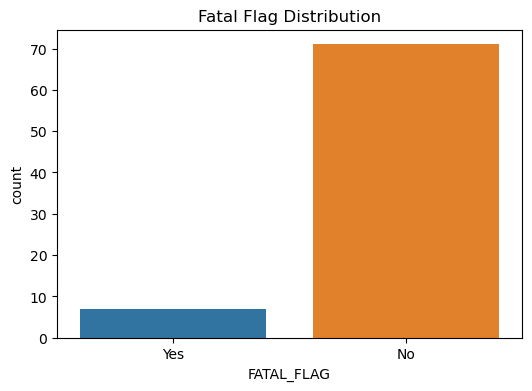

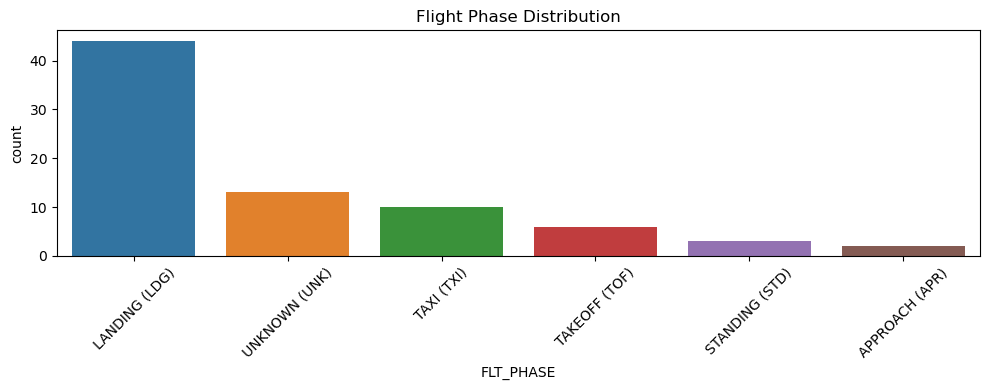

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df_encoded, x='FATAL_FLAG')
plt.title("Fatal Flag Distribution")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df_encoded, x='FLT_PHASE', order=df_encoded['FLT_PHASE'].value_counts().index)
plt.title("Flight Phase Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


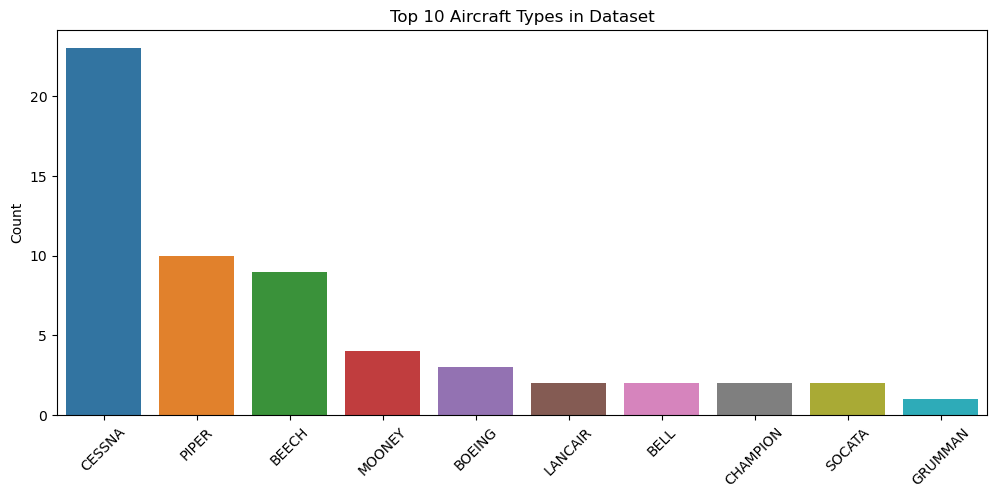

In [34]:
plt.figure(figsize=(12, 5))
top_aircraft = df_encoded['ACFT_MAKE_NAME'].value_counts().nlargest(10)
sns.barplot(x=top_aircraft.index, y=top_aircraft.values)
plt.title("Top 10 Aircraft Types in Dataset")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


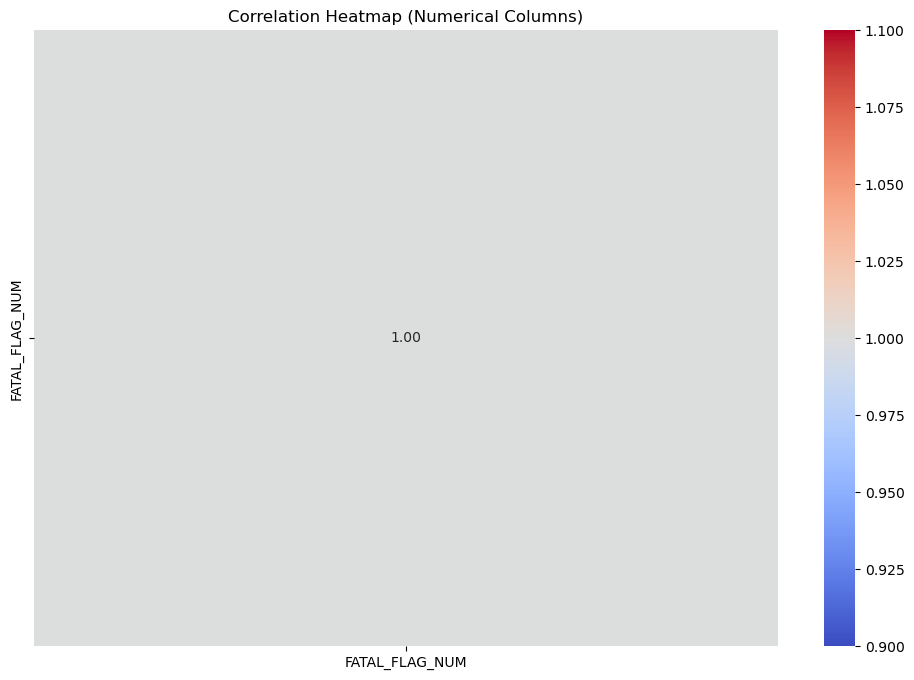

In [35]:
df_encoded['FATAL_FLAG_NUM'] = df_encoded['FATAL_FLAG'].map({'Yes': 1, 'No': 0})

numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()


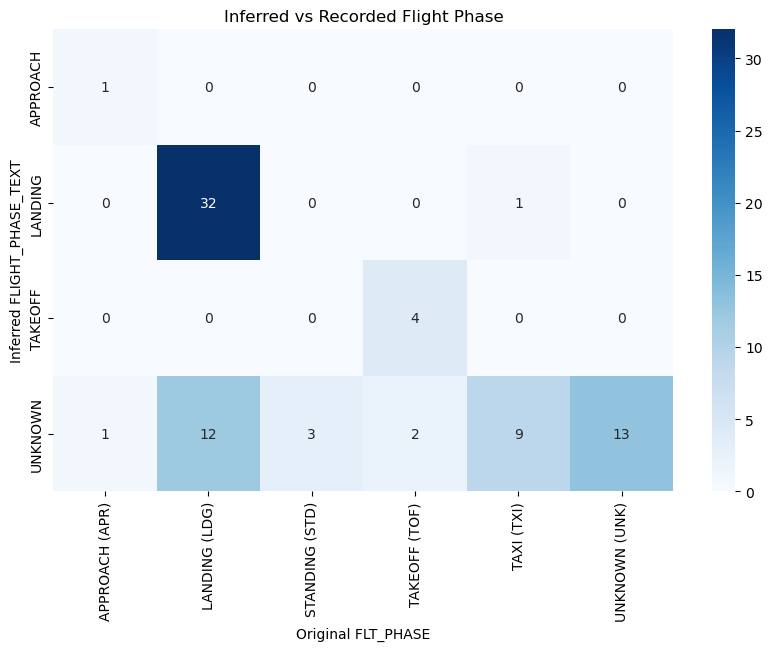

In [36]:
plt.figure(figsize=(10, 6))
phase_match = pd.crosstab(df_encoded['FLIGHT_PHASE_TEXT'], df_encoded['FLT_PHASE'])

sns.heatmap(phase_match, annot=True, cmap='Blues', fmt='d')
plt.title("Inferred vs Recorded Flight Phase")
plt.xlabel("Original FLT_PHASE")
plt.ylabel("Inferred FLIGHT_PHASE_TEXT")
plt.show()
